In [ ]:
# topic modeling - describes text - like dimensionality reduction

# latent - existing but concealed - like knowing what a book is 

# dirchilet 

# allocating words to get through topic

# identifies themes in amazon reviews
# identify needle in haystack - what documents are a red flag monitor email communications

# summarizes investment risk in banks

# how does a LDA model work?
# estimate an LDA model with Jensen, correctly interpret results when you are not getting a prediction, but a probability distribution, strategies to select topics

# two inputs, two outputs
# alpha parameter - document topic density - higher parameter, model has more topics 
# beta parameter - word distribution  higher, more common words are more important to topic

# we're learning words to different topics

# document topic distribution - rows add up to 1 if I sample, I should recreate the bag of words aspect of document

# topics are probability distributions

# mechanics of LDA:
# tables represent topics, people represent words, batches of people come in like batches of documents
# people are assigned a table, to whichever table is open at the moment - like allocation. people are d in lda
# As people leave, table does not have a fixed capacity
# you take a snapshot to see what the performance looks like
# you restart allocation again to get a better result. 
# tables are topics, and topics start to follow is dirchillet

# tables could use a gibbs model or bayesian technique

# you are looking at document and how well it falls in topic distribution. You choose input, how you preprocess text, determines how topic distributions look like. 

# anything listed as an objective is on the sprint challenge

#LDA latent dirchilet allocation
#a generalized probabilistic model
#identifying patterns of themes
#hidden - having a sense of what the book is about, dirchilet - distribution a
#why topic modeling:
#needle in haystack identify extremely opinionated comments, red flagging classified information
#monitors email communications
#summarize financial and security risk 50,000 250 pages each

#we are using gensim

In [1]:
import warnings
warnings.filterwarnings('ignore')

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Lesson 4*
On Monday we talked about summarizing your documents using just token counts. Today, we're going to learn about a much more sophiscated approach - learning 'topics' from documents. Topics are a latent structure. They are not directly observable in the data, but we know they're there by reading them.

> **latent**: existing but not yet developed or manifest; hidden or concealed.

## Use Cases
Primary use case: what the hell are your documents about? Who might want to know that in industry - 
* Identifing common themes in customer reviews
* Discoverying the needle in a haystack 
* Monitoring communications (Email - State Department) 

## Learning Objectives
*At the end of the lesson you should be able to:*
* <a href="#p1">Part 1</a>: Describe how an LDA Model works
* <a href="#p2">Part 2</a>: Estimate a LDA Model with Gensim
* <a href="#p3">Part 3</a>: Interpret LDA results
* <a href="#p4">Part 4</a>: Select the appropriate number of topics

## Part 1: Latent Dirchilet Allocation (LDA) Models
<a id="#p1"></a>

LDA is a "generative probabilistic model". 

Let's play with a modoel available [here](https://lettier.com/projects/lda-topic-modeling/)

## Part 2: Estimating LDA Models with Gensim
<a id="#p1"></a>

### A Litterary Introduction: *Jane Austen V. Charlotte Bronte*
Despite being born nearly forty years apart, modern fans often pit Jane Austen & Charlotte Bronte against one another in a battle for litterary  supremacy. The battle centers around the topics of education for women, courting, and marriage. The authors' similiar backgrounds naturally draw comparisons, but the modern fascination is probably due to novelility of British women publishing novels during the early 19th century. 

Can we help close a litterary battle for supremacy and simply acknowledge that the authors addressed different topics and deserve to be acknowledged as excellent authors each in their own right?

We're going to apply Latent Dirichlet Allocation a machine learning alogrithm for topic modeling to each of the author's novels to compare the distribution of topics in their novels.

In [4]:
conda install -c anaconda gensim

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\lilyx\Anaconda3

  added / updated specs:
    - gensim


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boto3-1.9.162              |             py_0          88 KB  anaconda
    botocore-1.12.199          |             py_0         3.4 MB  anaconda
    bz2file-0.98               |           py37_1          13 KB  anaconda
    gensim-3.4.0               |   py37hfa6e2cd_0        21.4 MB  anaconda
    jmespath-0.9.4             |             py_0          22 KB  anaconda
    mkl-service-1.1.2          |   py37hb782905_5         134 KB  anaconda
    s3transfer-0.2.1           |           py37_0          96 KB  anaconda
    smart_open-1.8.4           |             py_0          55 KB  anaconda
    ------------------------------------------------------------
                                        

In [5]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

C:\Users\lilyx\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### Novel Data
I grabbed the novel data pre-split into a bunch of smaller chuncks

In [6]:
path = './data/austen-brontë-split'
#chunks of text about 100 lines each 

### Text Preprocessing
**Challenge**: update the function `tokenize` with any technique you have learned so far this week. 

In [7]:
titles = [t[:-4] for t in os.listdir(path)]

In [8]:
titles[:5]

['Austen_Emma0000',
 'Austen_Emma0001',
 'Austen_Emma0002',
 'Austen_Emma0003',
 'Austen_Emma0004']

In [81]:
text

NameError: name 'text' is not defined

In [9]:
STOPWORDS = set(STOPWORDS).union(set(['said', 'mr', 'mrs']))

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [10]:
tokenize("Hello World! This a test of the tokenization method")

['hello', 'world', 'test', 'tokenization', 'method']

### Author DataFrame


In [11]:
df = pd.DataFrame(index=titles)

In [12]:
df.head()

""
Austen_Emma0000
Austen_Emma0001
Austen_Emma0002
Austen_Emma0003
Austen_Emma0004


In [13]:
df['author'] = df.reset_index()['index'].apply(lambda x: x.split('_')[0]).tolist()
df['book'] = df.reset_index()['index'].apply(lambda x: x.split('_')[1][:-4]).tolist()
df['section'] = df.reset_index()['index'].apply(lambda x: x[-4:]).tolist()
df['section'] = df['section'].astype('int')

In [14]:
df['author'] = df['author'].map({'Austen':1, 'CBronte':0})

In [15]:
df.author.value_counts()#400 sections from each author

0    441
1    372
Name: author, dtype: int64

### Streaming Documents
Here we use a new pythonic thingy: the `yield` statement in our fucntion. This allows us to iterate over a bunch of documents without actually reading them into memory. You can see how we use this fucntion later on. 

In [19]:
def doc_stream(path):#returns a generator object
    for f in os.listdir(path):
        with open(os.path.join(path,f)) as t:#iterate over path
            text = t.read().strip('\n')#open file in path
            tokens = tokenize(str(text))#generate tokens
            yield tokens# allows us to iterate over a bunch of documents one at a time,
            #returning what you need, without loading up memory

In [17]:
# streaming_data = doc_stream(path)
# streaming_data#generator object
# gets an instance of a class, returns docstring memory hash
#most gains are coming from not reading in all documents at once. 
#generator objects are exhaustable
#for drop in streaming_data:
#    print(drop)
#I gone over the entire generator, so it's no longer stored in memory
#it would need to be reinstantiated
#for loop can be used only once

### Gensim LDA Topic Modeling

In [ ]:
#pass in token as a string
#you will get a class instance
#id2word.token2id('england')#turn words into counts - like count vectorizor
#pass token as a string and looks up what number the word is indexed
#id2word is a class

In [82]:
path

'./data/austen-brontë-split'

In [20]:
# A Dictionary Representation of all the words in our corpus
id2word = corpora.Dictionary(doc_stream(path))#fit portion of vectorizor

In [21]:
id2word.doc2bow(tokenize("This is a sample message Darcy England England England"))#turn documents into counts
#id of england, and how many times in dataset

[(2754, 1), (3987, 3), (6602, 1), (6819, 1)]

In [22]:
import sys
sys.getsizeof(id2word)

56

In [23]:
len(id2word.keys())

22096

In [24]:
# Let's remove extreme values from the dataset
id2word.filter_extremes(no_below=10, no_above=0.75)#just like max_df
#word has to appear in at least 10 documents to be included. 
#75% of documents have the word in it

In [25]:
len(id2word.keys())#number of documents after filtering extremes

4922

In [26]:
# a bag of words(bow) representation of our corpus
# Note: we haven't actually read any text into memory here
corpus = [id2word.doc2bow(text) for text in doc_stream(path)]
#loop through everything in doc_stream, we are working with vector representations

#we don't input documents as raw text, they are dictionaries of words and their document, topics
#documents are vector representations similar to count vectorizer
#loop over everything in docstring tranform as as bag of words, stored in variable as "corpus"

In [27]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,#for reproducability not very stable, different results
                   num_topics = 15,
                   passes=10,
                   workers=4#multi-core
                  )

In [29]:
lda.print_topics()#topics are list of tuples, id of topic, and probability * word

[(0,
  '0.001*"miss" + 0.001*"day" + 0.001*"like" + 0.001*"know" + 0.001*"thing" + 0.001*"room" + 0.001*"thought" + 0.001*"love" + 0.001*"fairfax" + 0.001*"man"'),
 (1,
  '0.006*"mason" + 0.006*"rochester" + 0.005*"sir" + 0.005*"mary" + 0.005*"john" + 0.005*"church" + 0.005*"brother" + 0.004*"diana" + 0.004*"home" + 0.004*"wife"'),
 (2,
  '0.014*"weston" + 0.013*"emma" + 0.009*"think" + 0.008*"miss" + 0.008*"thing" + 0.008*"know" + 0.007*"knightley" + 0.007*"woodhouse" + 0.007*"great" + 0.006*"like"'),
 (3,
  '0.009*"jane" + 0.007*"father" + 0.007*"know" + 0.007*"think" + 0.007*"wickham" + 0.006*"elizabeth" + 0.006*"letter" + 0.005*"soon" + 0.005*"shall" + 0.005*"believe"'),
 (4,
  '0.014*"elizabeth" + 0.013*"darcy" + 0.010*"miss" + 0.010*"bingley" + 0.007*"bennet" + 0.007*"lady" + 0.006*"collins" + 0.005*"room" + 0.005*"young" + 0.005*"soon"'),
 (5,
  '0.006*"monsieur" + 0.006*"like" + 0.005*"madame" + 0.004*"thought" + 0.004*"know" + 0.004*"day" + 0.004*"hand" + 0.004*"english" + 0.0

[(0,
  '0.025*"marianne" + 0.022*"elinor" + 0.013*"willoughby" + 0.008*"sister" + 0.006*"jennings" + 0.006*"mother" + 0.006*"heart" + 0.005*"moment" + 0.005*"mind" + 0.005*"long"'),
 (1,
  '0.020*"miss" + 0.016*"reed" + 0.016*"bessie" + 0.015*"jane" + 0.010*"sir" + 0.009*"helen" + 0.007*"like" + 0.006*"yes" + 0.006*"shall" + 0.006*"think"'),
 (2,
  '0.020*"marianne" + 0.016*"elinor" + 0.013*"dashwood" + 0.010*"john" + 0.009*"mother" + 0.009*"edward" + 0.009*"house" + 0.006*"sir" + 0.006*"willoughby" + 0.006*"middleton"'),
 (3,
  '0.021*"emma" + 0.014*"miss" + 0.013*"harriet" + 0.011*"weston" + 0.010*"elton" + 0.010*"knightley" + 0.009*"thing" + 0.008*"think" + 0.008*"woodhouse" + 0.007*"know"'),
 (4,
  '0.009*"night" + 0.007*"bretton" + 0.007*"like" + 0.007*"saw" + 0.006*"long" + 0.005*"thought" + 0.004*"white" + 0.004*"dr" + 0.004*"light" + 0.004*"know"'),
 (5,
  '0.019*"elizabeth" + 0.019*"collins" + 0.014*"charlotte" + 0.011*"lucas" + 0.010*"jane" + 0.009*"bennet" + 0.007*"miss" + 0

In [31]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]#cleaning

In [32]:
topics = [' '.join(t[0:5]) for t in words]

In [33]:
for t in topics:
    print(t)
    print('\n')
#print(topics[0])#typically use the first 3-5 words for visualization purposes

miss day like know thing


mason rochester sir mary john


weston emma think miss thing


jane father know think wickham


elizabeth darcy miss bingley bennet


monsieur like madame thought know


miss jane mother know sure


hunsden crimsworth ingram like rochester


emma miss harriet weston elton


elinor marianne know mother think


elizabeth jane bennet lydia know


graham georgiana young heard bessie


like night thought long room


elinor marianne sir colonel jennings


st shall john diana jane




## Part 3: Interpret LDA Results
<a id="#p3"></a>

### Topic Distance Visualization

In [34]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [35]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)
#overall term frequency
#estimated term frequency of particular topic
#good for what the model is trying to express
#ie topic 1 is half frequency of like
#look for extinguishable
#bubbles of same size what percentage of documents hae topic 1
#bubbles that don't overlap
#size of bubbles - how many documents have word occurrence
#term frequency how many times word appears
#inner topic distance to diagnose how similar dissimilar topics are, topics overlapping, how good our topic model is

#no selection, represents 30 most salient terms - most import words in corpus
#select 1 - overall term frequency as the glue
#estimated term frequency within selected topic - like appears a bit, salient of like is half of frequency of all occurence
#if sample topic one, 50 samples, I'd expect estimate term frequency is half that of term frequency of like
#slider - at 0, shows words that are most important, 50-50 words that are important to both- shows what topic is trying to express
#overall term frequency is total occurrence word appears

C:\Users\lilyx\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.106132  0.021048       1        1  27.061514
9     -0.056052 -0.023343       2        1  17.491405
5      0.099609 -0.010929       3        1  16.611914
8     -0.092838  0.031784       4        1  14.483068
4     -0.093641 -0.036056       5        1   7.120611
10    -0.098865 -0.056759       6        1   5.319049
7      0.067319  0.001372       7        1   2.986785
3     -0.121154 -0.053146       8        1   2.567614
14     0.101883 -0.100701       9        1   1.679491
2     -0.096512  0.052815      10        1   1.610345
13    -0.035157 -0.016178      11        1   1.210585
11     0.071414  0.086691      12        1   0.710734
6     -0.039411  0.117158      13        1   0.708700
1      0.113866 -0.019705      14        1   0.419344
0      0.073406  0.005950      15        1   0.018844, topic_info=     Category         Freq       Term        Total  loglift  logprob
170   Default  1518.000000       miss  1518.000000  30.0000  30.0000
81    Default   863.000000       emma   863.000000  29.0000  29.0000
4183  Default   639.000000     elinor   639.000000  28.0000  28.0000
139   Default   931.000000       jane   931.000000  27.0000  27.0000
372   Default  1426.000000       know  1426.000000  26.0000  26.0000
4186  Default   527.000000   marianne   527.000000  25.0000  25.0000
376   Default  1354.000000       like  1354.000000  24.0000  24.0000
1370  Default   620.000000       john   620.000000  23.0000  23.0000
260   Default  1304.000000      think  1304.000000  22.0000  22.0000
1203  Default   618.000000  elizabeth   618.000000  21.0000  21.0000
278   Default   435.000000     weston   435.000000  20.0000  20.0000
173   Default   647.000000     mother   647.000000  19.0000  19.0000
418   Default   926.000000      shall   926.000000  18.0000  18.0000
421   Default   593.000000        sir   593.000000  17.0000  17.0000
258   Default   781.000000      thing   781.000000  16.0000  16.0000
312   Default   835.000000       come   835.000000  15.0000  15.0000
918   Default   527.000000    harriet   527.000000  14.0000  14.0000
59    Default  1062.000000        day  1062.000000  13.0000  13.0000
371   Default   388.000000  knightley   388.000000  12.0000  12.0000
4662  Default   366.000000  rochester   366.000000  11.0000  11.0000
782   Default   625.000000      heard   625.000000  10.0000  10.0000
1179  Default   598.000000        yes   598.000000   9.0000   9.0000
428   Default   609.000000       sure   609.000000   8.0000   8.0000
820   Default   892.000000       room   892.000000   7.0000   7.0000
282   Default   310.000000  woodhouse   310.000000   6.0000   6.0000
152   Default   947.000000       long   947.000000   5.0000   5.0000
109   Default   821.000000      great   821.000000   4.0000   4.0000
3806  Default   399.000000      darcy   399.000000   3.0000   3.0000
2109  Default   377.000000    fairfax   377.000000   2.0000   2.0000
570   Default   660.000000      young   660.000000   1.0000   1.0000
...       ...          ...        ...          ...      ...      ...
59    Topic15     0.048148        day  1062.960815  -1.4256  -7.0233
258   Topic15     0.042310      thing   781.127502  -1.2468  -7.1525
285   Topic15     0.031527      years   316.392700  -0.6372  -7.4467
4666  Topic15     0.023981      adele   140.888275  -0.1018  -7.7203
553   Topic15     0.031251    subject   332.618042  -0.6960  -7.4555
820   Topic15     0.042122       room   892.311646  -1.3843  -7.1570
4705  Topic15     0.029711   monsieur   291.733948  -0.6154  -7.5061
376   Topic15     0.047214       like  1354.407959  -1.6875  -7.0429
3746  Topic15     0.033289     madame   423.171295  -0.8736  -7.3923
1179  Topic15     0.036401        yes   598.031006  -1.1301  -7.3030
918   Topic15     0.035022    harriet   527.605896  -1.0434  -7.3416
1370  Topic15     0.036051       john   620.976196  -1.1774  -7.3126
261

### Overall Model / Documents

In [36]:
lda[corpus[0]]#first chapter
#we've been working with topics themselves, but we want to score topic distribution
#document topic distribution - [] whatever document we want - 0 - first document

[(2, 0.41472727), (4, 0.27677014), (8, 0.2740911), (9, 0.03259636)]

In [37]:
distro = [lda[d] for d in corpus]

In [38]:
distro[0]

[(2, 0.41470346), (4, 0.2773193), (8, 0.27497435), (9, 0.031187696)]

In [40]:
def update(doc):
        d_dist = {k:0 for k in range(0,15)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

#transforms distro into a complete distribution

In [41]:
d_dist = {k:0 for k in range(0,15)}

In [42]:
d_dist

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0}

In [43]:
df = pd.DataFrame.from_records(new_distro, index=titles)
df.columns = topics
df['author'] = df.reset_index()['index'].apply(lambda x: x.split('_')[0]).tolist()

In [44]:
df.head()
#preprocessing isn't sufficient enough for good result. the result of analysis shows different characters they write about
#we can extract names, create a list of names - label names male and female to see other themes

,miss day like know thing,mason rochester sir mary john,weston emma think miss thing,jane father know think wickham,elizabeth darcy miss bingley bennet,monsieur like madame thought know,miss jane mother know sure,hunsden crimsworth ingram like rochester,emma miss harriet weston elton,elinor marianne know mother think,elizabeth jane bennet lydia know,graham georgiana young heard bessie,like night thought long room,elinor marianne sir colonel jennings,st shall john diana jane,author
Austen_Emma0000,0,0.0,0.414703,0.0,0.277319,0.0,0.0,0.0,0.274974,0.031188,0.0,0.0,0.0,0.0,0.0,Austen
Austen_Emma0001,0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.997247,0.000000,0.0,0.0,0.0,0.0,0.0,Austen
Austen_Emma0002,0,0.0,0.242974,0.0,0.000000,0.0,0.0,0.0,0.754632,0.000000,0.0,0.0,0.0,0.0,0.0,Austen
Austen_Emma0003,0,0.0,0.275066,0.0,0.000000,0.0,0.0,0.0,0.331318,0.391460,0.0,0.0,0.0,0.0,0.0,Austen
Austen_Emma0004,0,0.0,0.000000,0.0,0.127498,0.0,0.0,0.0,0.870351,0.000000,0.0,0.0,0.0,0.0,0.0,Austen


In [45]:
df.groupby('author').mean()

,miss day like know thing,mason rochester sir mary john,weston emma think miss thing,jane father know think wickham,elizabeth darcy miss bingley bennet,monsieur like madame thought know,miss jane mother know sure,hunsden crimsworth ingram like rochester,emma miss harriet weston elton,elinor marianne know mother think,elizabeth jane bennet lydia know,graham georgiana young heard bessie,like night thought long room,elinor marianne sir colonel jennings,st shall john diana jane
author,,,,,,,,,,,,,,,
Austen,0,0.000701,0.034084,0.057485,0.151256,0.002134,0.010567,0.001796,0.305976,0.289046,0.114940,0.000000,0.010373,0.018780,0.000000
CBronte,0,0.006914,0.000096,0.002775,0.007147,0.293535,0.004138,0.053961,0.003582,0.075156,0.006658,0.015023,0.488894,0.005118,0.034242


## Can we see if one of the authors focus more on men than women? - Ned

*  Use Spacy for text prepocessing
*  Extract the Named Entities from the documents using Spacy (command is fairly straight forward)
*  Create unique list of names from the authors (you'll find that there are different types of named entities not all people)
*  Label the names with genders (can you this by hand or you use the US census name lists)
*  Customize your processing to replace the proper name with your gender from the previous step's lookup table
*  Then follow the rest of the LDA flow


## Part 4: Selecting the Number of Topics
<a id="#p4"></a>

In [63]:
from gensim.models.coherencemodel import CoherenceModel#selects proper number of topics as metric like skre or elbow plot, most coherent model possible, 
#model invented in 2003 lda model

def compute_coherence_values(dictionary, corpus, path, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models 
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        stream = doc_stream(path)
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=stream, dictionary=dictionary, coherence='c_v')#pass in our lda model, as text, dictionary, pass in type of coherence value
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [64]:
# Can take a long time to run.

import warnings
warnings.filterwarnings('ignore')
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        path=path, 
                                                        start=2, 
                                                        limit=40, 
                                                        step=6)

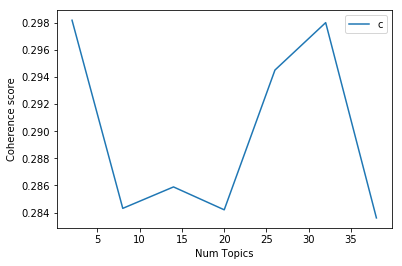

In [65]:
# Show graph
import matplotlib.pyplot as plt

limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
#we're looking for the highest coherence value, we want to see the highest point possible before it dips down. 
#looking for closer to 1, individual observations possible. 
#highest coherence possible, lowest number of topics

#distinct categories that don't overlap
#words inside categories to go together in a particular way

In [66]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    #these topics have the highest coherence values
    #coherence is quality topic model
    # we can highest quality when the number of topics is at 8 
    #coherence - how distinct are topics from one another, how well the words within a topic belong together
    #way of expressing topics are distinct

Num Topics = 2  has Coherence Value of 0.2982
Num Topics = 8  has Coherence Value of 0.2843
Num Topics = 14  has Coherence Value of 0.2859
Num Topics = 20  has Coherence Value of 0.2842
Num Topics = 26  has Coherence Value of 0.2945
Num Topics = 32  has Coherence Value of 0.298
Num Topics = 38  has Coherence Value of 0.2836


In [80]:
lda[id2word.doc2bow[tokenize['This is a sample document to score with a topic distribution']]]

TypeError: 'function' object is not subscriptable

In [67]:
import spacy

nlp = spacy.load('en_core_web_md')

In [68]:
test = "Ned ask me a question about England today."

In [72]:
import spacy
nlp = spacy.load('en_core_web_md')
doc = nlp(test)

for token in doc:
    print(token.text, token.lemma_, token.pos_)#to get named entities out of spacey, tagging on sentence, so we get proper noun
    #parse speech tagging
    #named entity is gets from speech tagging
    # we query from ent.text
    
#refit lda model with those specific topics

Ned Ned PROPN
ask ask VERB
me -PRON- PRON
a a DET
question question NOUN
about about ADP
England England PROPN
today today NOUN
. . PUNCT


In [73]:
for ent in doc.ents:
    print(ent.text, ent.label_)
    
#sometimes you do what to excluded proper nouns but you need to figure out how often the nounds are mentioned

Ned PERSON
England GPE
today DATE


In [74]:
#I want to inspect people from the data

def doc_stream(path):#for reference
    for f in os.listdir(path):
        with open(os.path.join(path,f)) as t:
            text = t.read().strip('\n')
            yield text

def get_people(docstream):#empty list iterate items in doctring, return named entities, we get a list of people
    
    ppl = []
    
    for d in docstream:
        
        doc = nlp(d)
        
        for ent in doc.ents:
            
            if ent.label_ == "PERSON":
                ppl.append(ent.text)
                
    return set(ppl)
#entity recognition has a neural network behind it

In [75]:
people = get_people(doc_stream(path))

In [76]:
people = pd.Series(list(people))

In [77]:
people.shape#1800 names

(1802,)

In [78]:
people.head(50)

0                 I. BRETTON\nII
1                          Queen
2                Dashwood?--Poor
3                      Goldsmith
4                    Maria Lucas
5                     M. Isidore
6                this M. Emanuel
7          Woodhouse Miss Taylor
8             sufficient.-- Emma
9                   Harriet!--It
10                        Allons
11                Hawkins!--Good
12                 M. PAUL\nXXXI
13                 Je ne vous ai
14                Donwell Lane\n
15                   her.-- Emma
16           Marianne of farther
17                 Richard Mason
18       the Misses Brocklehurst
19                      Matthieu
20                         Gryce
21                         Jesus
22               De Bassompierre
23                         Elton
24                           Vos
25                    Guy Fawkes
26                       Goddard
27                  Paul de Kock
28    Vous etes donc bien malade
29                          Mais
30        

## Additional Resources
## Resources

* [Gensim](https://radimrehurek.com/gensim/): Python package for topic modeling, nlp, word vectorization, and few other things. Well maintained and well documented.
* [Topic Modeling with Gensim](http://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#11createthedictionaryandcorpusneededfortopicmodeling): A kind of cookbook for LDA with gensim. Excellent overview, but the you need to be aware of missing import statements and assumed prior knowledge.
* [Chinese Restuarant Process](https://en.wikipedia.org/wiki/Chinese_restaurant_process): That really obscure stats thing I mentioned... 
* [PyLDAvis](https://github.com/bmabey/pyLDAvis): Library for visualizing the topic model and performing some exploratory work. Works well. Has a direct parrell implementation in R as well. 
* [Rare Technologies](https://rare-technologies.com/): The people that made & maintain gensim and a few other libraries.
* [Jane Austen v. Charlotte Bronte](https://www.literaryladiesguide.com/literary-musings/jane-austen-charlotte-bronte-different-alike/)

In [ ]:
#what do people say by topic of ratings
#topic modeling as an addendum to all kinds of classfication
#topic modelings - for information retrieval like search on Tuesday
#genetics in distribution, originally applied to study genomic sequences